In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd

In [224]:
df = yf.download("TATASTEEL.NS", start="2012-07-15", end="2025-04-15")

/tmp/ipython-input-224-463514247.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TATASTEEL.NS", start="2012-07-15", end="2025-04-15")
[*********************100%***********************]  1 of 1 completed


In [225]:
df.to_csv("tata.csv",index = True)

In [226]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2025-04-04,137.190628,149.503490,136.809516,149.141912,80846143
2025-04-07,126.529259,127.379442,122.473840,125.082991,121806340
2025-04-08,127.311035,133.096122,125.102544,131.815978,68999181
2025-04-09,124.281677,127.037412,122.444524,127.037412,73399980
2025-04-11,130.379471,131.630300,127.516250,131.600984,73706472


In [227]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3140 entries, 2012-07-16 to 2025-04-11
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, TATASTEEL.NS)   3140 non-null   float64
 1   (High, TATASTEEL.NS)    3140 non-null   float64
 2   (Low, TATASTEEL.NS)     3140 non-null   float64
 3   (Open, TATASTEEL.NS)    3140 non-null   float64
 4   (Volume, TATASTEEL.NS)  3140 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 147.2 KB


In [228]:
from matplotlib import pyplot as plt

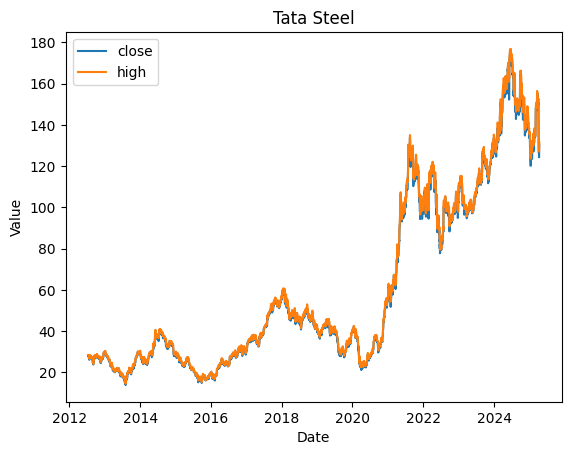

In [229]:
plt.plot(df.index,df.Close)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Tata Steel")
# plt.plot(df.index,df.Open)
plt.plot(df.index,df.High)
# plt.plot(df.index,df.Low)
plt.legend(["close","high"])

In [230]:
ewma = df['Close'].ewm(alpha=0.3).mean()

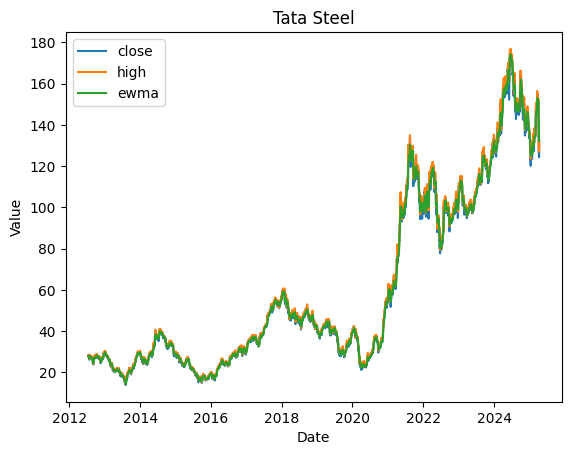

In [231]:
plt.plot(df.index,df.Close)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Tata Steel")
# plt.plot(df.index,df.Open)
plt.plot(df.index,df.High)
# plt.plot(df.index,df.Low)
plt.plot(df.index,ewma)
plt.legend(["close","high","ewma"])

In [232]:
df["EWMA"] = ewma

In [233]:
lst = []
for i in range(len(df['EWMA'])):
  if df['EWMA'].iloc[i] > df['EWMA'].iloc[i-1]:
    lst.append(1)
  else:
    lst.append(0)
df["new_col"] = lst

In [234]:
df

Price,Close,High,Low,Open,Volume,EWMA,new_col
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,,
Date,,,,,,,
2012-07-16,27.697218,28.427075,27.578404,28.345602,42108163,27.697218,0
2012-07-17,27.551245,28.084210,27.486745,27.904291,35627600,27.611351,0
2012-07-18,27.948425,28.091004,27.449408,27.496934,35242635,27.765266,1
2012-07-19,28.138527,28.304864,28.023106,28.243760,28262689,27.912625,1
2012-07-20,28.240368,28.372760,27.938240,27.938240,24541860,28.030812,1
...,...,...,...,...,...,...,...
2025-04-04,137.190628,149.503490,136.809516,149.141912,80846143,146.785858,0
2025-04-07,126.529259,127.379442,122.473840,125.082991,121806340,140.708879,0


In [235]:
df["target"] = df["new_col"].shift(-1)
df.drop("new_col",axis = 1,inplace = True)
df.dropna(inplace=True)

In [236]:
df

Price,Close,High,Low,Open,Volume,EWMA,target
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,,
Date,,,,,,,
2012-07-16,27.697218,28.427075,27.578404,28.345602,42108163,27.697218,0.0
2012-07-17,27.551245,28.084210,27.486745,27.904291,35627600,27.611351,1.0
2012-07-18,27.948425,28.091004,27.449408,27.496934,35242635,27.765266,1.0
2012-07-19,28.138527,28.304864,28.023106,28.243760,28262689,27.912625,1.0
2012-07-20,28.240368,28.372760,27.938240,27.938240,24541860,28.030812,0.0
...,...,...,...,...,...,...,...
2025-04-03,150.119125,152.415577,149.122381,149.513259,15117526,150.898100,0.0
2025-04-04,137.190628,149.503490,136.809516,149.141912,80846143,146.785858,0.0


In [237]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal


In [250]:
model = Sequential()
model.add(Dense(64,activation="relu",input_dim =6, kernel_regularizer=l2(0.001),kernel_initializer=HeNormal))
model.add(Dropout(0.3))
model.add(BatchNormalization())
#model.add(Dense(32,activation="relu",))
#model.add(Dropout(0.3))
#model.add(Dense(16,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(8,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [251]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,161 (4.54 KB)

 Non-trainable params: 152 (608.00 B)

In [241]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis=1)
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [242]:
X

Price,Close,High,Low,Open,Volume,EWMA
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,
Date,,,,,,
2012-07-16,27.697218,28.427075,27.578404,28.345602,42108163,27.697218
2012-07-17,27.551245,28.084210,27.486745,27.904291,35627600,27.611351
2012-07-18,27.948425,28.091004,27.449408,27.496934,35242635,27.765266
2012-07-19,28.138527,28.304864,28.023106,28.243760,28262689,27.912625
2012-07-20,28.240368,28.372760,27.938240,27.938240,24541860,28.030812
...,...,...,...,...,...,...
2025-04-03,150.119125,152.415577,149.122381,149.513259,15117526,150.898100
2025-04-04,137.190628,149.503490,136.809516,149.141912,80846143,146.785858


In [243]:
y_train.shape

(2511,)

In [244]:
X_train

Price,Close,High,Low,Open,Volume,EWMA
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,
Date,,,,,,
2024-03-01,143.638779,144.309314,136.981299,136.981299,123709943,138.462341
2019-11-01,33.523132,33.808436,31.719008,31.891030,241111950,32.165016
2022-02-16,104.895386,107.192558,104.428911,106.937316,66092140,106.070413
2016-11-08,30.732830,31.240469,30.495931,31.135179,34148125,30.746857
2013-06-11,19.091698,19.651820,18.857464,19.553374,51578891,19.749407
...,...,...,...,...,...,...
2025-01-31,131.552124,131.923469,126.969003,128.131886,26689228,128.290559
2017-01-02,30.589945,30.710272,29.247520,29.589708,58548488,29.810053


In [245]:
y_test

,target
Date,
2019-11-07,0.0
2015-10-15,1.0
2014-05-16,1.0
2023-11-22,1.0
2022-02-07,1.0
...,...
2016-03-21,1.0
2023-10-25,0.0
2021-10-06,0.0


In [246]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
y_train



,target
Date,
2024-03-01,1.0
2019-11-01,1.0
2022-02-16,0.0
2016-11-08,0.0
2013-06-11,0.0
...,...
2025-01-31,1.0
2017-01-02,1.0
2017-02-21,1.0


In [248]:
df.head(100)

Price,Close,High,Low,Open,Volume,EWMA,target
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,,
Date,,,,,,,
2012-07-16,27.697218,28.427075,27.578404,28.345602,42108163,27.697218,0.0
2012-07-17,27.551245,28.084210,27.486745,27.904291,35627600,27.611351,1.0
2012-07-18,27.948425,28.091004,27.449408,27.496934,35242635,27.765266,1.0
2012-07-19,28.138527,28.304864,28.023106,28.243760,28262689,27.912625,1.0
2012-07-20,28.240368,28.372760,27.938240,27.938240,24541860,28.030812,0.0
...,...,...,...,...,...,...,...
2012-12-07,26.767075,27.425644,26.621104,27.327197,37004318,26.640086,1.0
2012-12-10,27.177834,27.218569,26.787447,26.817999,27241547,26.801410,1.0


In [252]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split = 0.1, batch_size= 32)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5147 - loss: 1.0489 - val_accuracy: 0.5595 - val_loss: 0.8308
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5218 - loss: 0.8931 - val_accuracy: 0.5873 - val_loss: 0.7678
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5133 - loss: 0.8592 - val_accuracy: 0.5873 - val_loss: 0.7619
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5564 - loss: 0.8027 - val_accuracy: 0.5992 - val_loss: 0.7569
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5609 - loss: 0.7872 - val_accuracy: 0.6032 - val_loss: 0.7534
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5587 - loss: 0.7846 - val_accuracy: 0.5992 - val_loss: 0.7492
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5580 - loss: 0.7729 - val_accuracy: 0.5992 - val_loss: 0.7447
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5719 - loss: 0.7605 - val_accuracy: 0.5952 - v

In [253]:
y_test_pred = model.predict(X_test_scaled)
y_test_pred.round()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [254]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
print(accuracy_score(y_test,y_test_pred.round()),
mean_absolute_error(y_test,y_test_pred),
mean_squared_error(y_test,y_test_pred))

0.7420382165605095 0.38499312208384084 0.1791204040409116


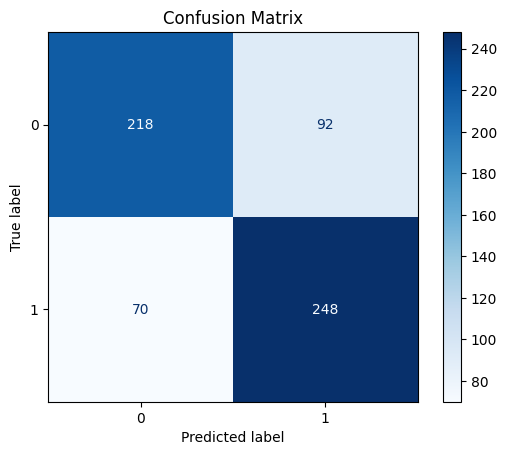

In [255]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Round predictions to 0 or 1 for classification
y_pred_binary = y_test_pred.round()

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


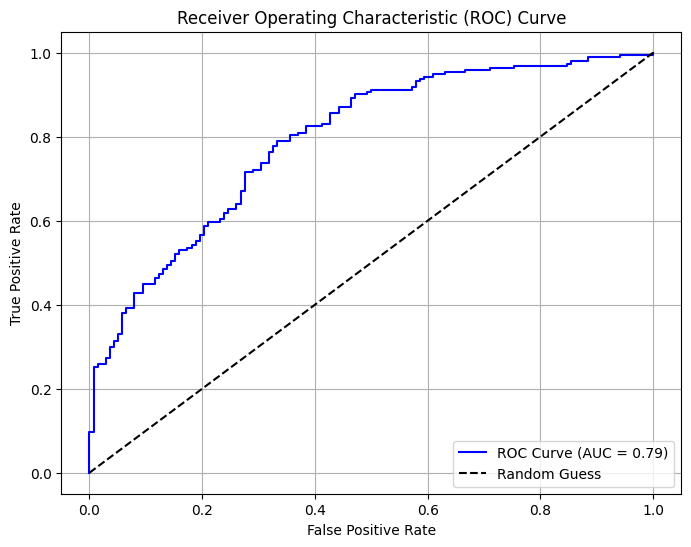

In [223]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
